In [1]:
import konlpy
from konlpy.tag import Kkma, Komoran, Okt, Hannanum
import pandas as pd
import numpy as np
import re

In [2]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
import platform

path = "C:/Windows/Fonts/malgun.ttf"

from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~~')

In [ ]:
iscream7_10 = pd.read_csv('아이스크림 에듀 라벨링.csv', encoding = 'cp949')
iscream7_10 = iscream7_10.iloc[:, 1:]
iscream7_10

In [ ]:
# 결측치 제거
iscream7_10 = iscream7_10.dropna()
iscream7_10

In [ ]:
# 한글과 공백을 제외하고 모두 제거
iscream7_10['text'] = iscream7_10['text'].str.replace('[^가-힣 ] ', '')
iscream7_10

In [ ]:
# 공백이나 값이 없다면 null로 변경 후 결측치 재확인
iscream7_10['text'] = iscream7_10['text'].str.replace('^ +', '')
iscream7_10['text'].replace('', np.nan, inplace = True)
iscream7_10.dropna(inplace=True)
print(iscream7_10.isnull().sum())

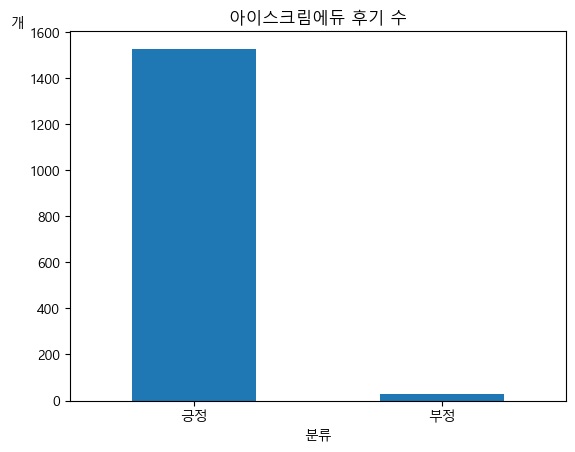

In [12]:
# 아이스크림에듀 후기 수
iscream7_10['label'].value_counts().plot(kind = 'bar')
plt.title('아이스크림에듀 후기 수')
plt.ylabel('개', loc = 'top', rotation = 0)
plt.xlabel('분류')
plt.xticks([0, 1], ['긍정', '부정'], rotation = 0)
plt.show()

In [13]:
print(iscream7_10.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0     30
1      1   1530


In [14]:
pos = iscream7_10[iscream7_10['label'] == 1].reset_index(drop=True)
neg = iscream7_10[iscream7_10['label'] == 0].reset_index(drop=True)

## 필터링 전
* 불용어 리스트 불러오기

In [15]:
f = open('불용어.txt', 'r', encoding = 'utf-8')
stopwords = f.read().split('\n')
f.close()

In [ ]:
stopwords

In [17]:
okt = Okt()

In [18]:
okt.morphs([sentence for sentence in pos['text']][0])

['유익한', '연수', '였습니다', '.']

* 긍정 리뷰 단어 빈도 수

In [19]:
pos_df = []

for sentence in pos['text']:
    
    try:
        morphs = okt.morphs(sentence)
        stopwords_removed_morphs = [word for word in morphs
                                   if not word in stopwords]
        pos_df.append(stopwords_removed_morphs)
        
    except:
        continue

In [33]:
pos_df_dict = dict()

for pos in pos_df:
    
    for pos_word in pos:        
        
        if len(pos_word) == 1:
            continue
        if pos_word not in pos_df_dict:
            pos_df_dict[pos_word] = 0

        pos_df_dict[pos_word] += 1

In [ ]:
pos_df_dict

In [ ]:
freq_pos = sorted(pos_df_dict.items(), key=lambda x: x[1], reverse = True)
freq_pos_dict = dict(freq_pos)
freq_pos_dict

* 긍정 워드클라우드

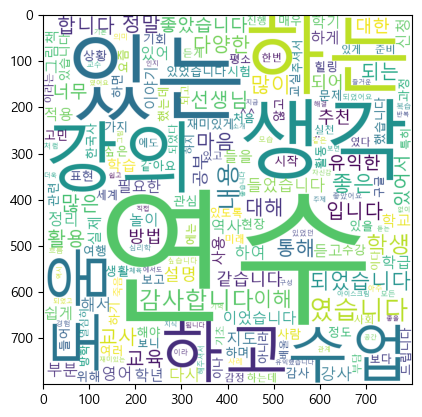

In [23]:
wc = WordCloud(font_path = path, width=400, height=400, scale=2.0, background_color = 'white', max_words = 200, stopwords = stopwords)
wc = wc.generate_from_frequencies(freq_pos_dict)
plt.figure()
plt.imshow(wc)
wc.to_file('워드클라우드긍정.png')

* 부정 리뷰 단어 빈도 수

In [24]:
neg_df = []

for sentence in neg['text']:
    
    try:
        morphs = okt.morphs(sentence)
        stopwords_removed_morphs = [word for word in morphs
                                   if not word in stopwords]
        neg_df.append(stopwords_removed_morphs)
        
    except:
        continue

In [38]:
# 딕셔너리 생성
neg_df_dict = dict()

# neg_df: 토큰화된 데이터로 이루어진 데이터프레임
for neg in neg_df:
    
    for neg_word in neg:        
        
        # 해당 토큰이 한 글자면 제외
        if len(neg_word) == 1:
            continue
        
        # 해당 토큰이 딕셔너리에 없으면 키값으로 할당
        if neg_word not in neg_df_dict:
            neg_df_dict[neg_word] = 0
        
        # 해당 토큰 개수 세기
        neg_df_dict[neg_word] += 1

In [ ]:
# 빈도 수를 기준으로 내림차순 정렬
freq_neg = sorted(neg_df_dict.items(), key=lambda x: x[1], reverse = True)
freq_neg_dict = dict(freq_neg)


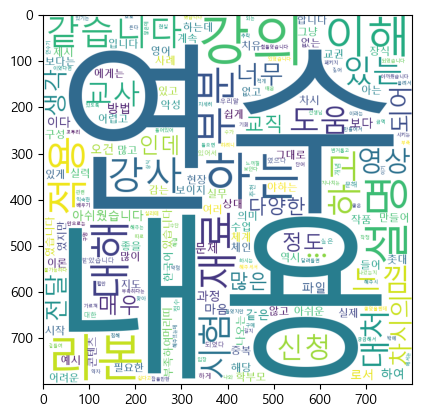

In [27]:
# 부정 워드클라우드
wc = WordCloud(font_path = path, width=400, height=400, scale=2.0, background_color = 'white', max_words = 200, stopwords = stopwords)
wc = wc.generate_from_frequencies(freq_neg_dict)
plt.figure()
plt.imshow(wc)
wc.to_file('워드클라우드부정.png')

## 필터링 후

* 공통 단어 제거

In [28]:
same = set(freq_pos_dict.keys() & freq_neg_dict.keys())

In [29]:
same = list(same)

file_name = '아이스크림공통.txt'

with open(file_name, 'w+') as file:
    file.write('\n'.join(same))   # same은 리스트 형태

* 긍정 워드클라우드

In [ ]:
for s in same:
    freq_pos_dict.pop(s)


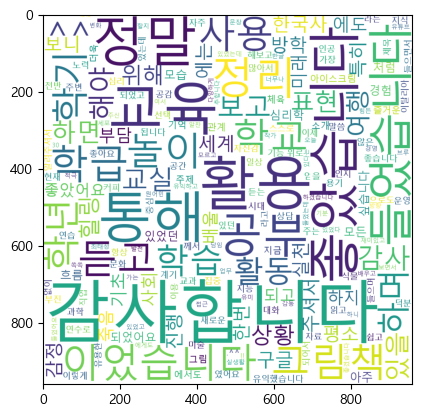

In [31]:
wc = WordCloud(font_path = path, width=480, height=480, scale=2.0, background_color = 'white', max_words = 200, stopwords = stopwords)
wc = wc.generate_from_frequencies(freq_pos_dict)
plt.figure()
plt.imshow(wc)
wc.to_file('워드클라우드긍정(필터링).png')

* 부정 워드클라우드

In [ ]:
for s in same:
    freq_neg_dict.pop(s)


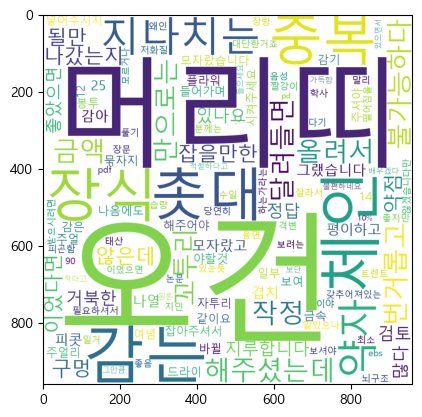

In [112]:
wc = WordCloud(font_path = path, width=480, height=480, scale=2.0, background_color = 'white', max_words = 200, stopwords = stopwords)
wc = wc.generate_from_frequencies(freq_neg_dict)
plt.figure()
plt.imshow(wc)
wc.to_file('워드클라우드부정(필터링).png')

In [111]:
# 치환 데이터 불러오기
replace_list = pd.read_csv('replace_list.csv', encoding = 'cp949')

In [85]:
len(replace_list)

68

In [93]:
nonreplaced_dict = freq_neg_dict.copy()

In [94]:
replaced_dict = dict()

# 데이터 치환
for freq_neg in freq_neg_dict:
    for i in range(len(replace_list['before_replacement'])):

        # 키 값이 치환되어야 하는 값일 때
        if freq_neg == replace_list['before_replacement'][i]:

            # 해당 키 값의 빈도 수 추출
            value = nonreplaced_dict.pop(freq_neg)

            # 그 값이 딕셔너리 키에 없으면 키로 할당
            if replace_list['after_replacement'][i] not in replaced_dict:
                replaced_dict[replace_list['after_replacement'][i]] = 0

            # 새로운 키 값에 빈도 수 할당
            replaced_dict[replace_list['after_replacement'][i]] += value

In [95]:
# 중복 단어 제거한 부정 후기에서 사용된 단어가 나타난 빈도(원데이터)
sum(freq_neg_dict.values())

131

In [98]:
# 치환된 단어의 총 사용 빈도
sum(replaced_dict.values())

74

In [96]:
# 치환되지 않은 단어의 총 사용 빈도
sum(nonreplaced_dict.values())

57

In [99]:
# 데이터 치환 후 부정 후기에서 사용된 단어가 나타난 빈도
new_neg_dict = dict(replaced_dict, **nonreplaced_dict)

In [ ]:
# 빈도 수를 기준으로 내림차순 정렬
rep_freq_neg = sorted(new_neg_dict.items(), key=lambda x: x[1], reverse = True)
rep_freq_neg_dict = dict(rep_freq_neg)


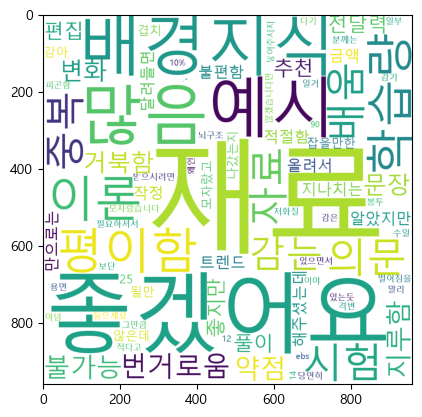

In [109]:
wc = WordCloud(font_path = path, width=480, height=480, scale=2.0, background_color = 'white', max_words = 200, stopwords = stopwords)
wc = wc.generate_from_frequencies(rep_freq_neg_dict)
plt.figure()
plt.imshow(wc)
wc.to_file('워드클라우드부정(치환).png')